In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Clustering Algorithms for Primary Dataset

In [3]:
dataset = 'primary'
data = pd.read_csv(f'../dataset/mapped_{dataset}.csv', sep=',')
data = data.drop(columns=['uuid'])
variable_names = data.columns.tolist()

# need to normalize data from SOMs
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print(norm_data)

          price    artist  cardFinish  colorIdentity    colors  edhrecRank  \
0      0.002581  0.773243         1.0       0.766667  0.766667    0.760212   
1      0.063226  0.773243         0.5       0.766667  0.766667    0.760212   
2      0.167742  0.773243         1.0       0.766667  0.766667    0.760212   
3      0.018065  0.773243         1.0       0.766667  0.766667    0.760212   
4      0.126452  0.773243         1.0       0.766667  0.766667    0.760212   
...         ...       ...         ...            ...       ...         ...   
15209  0.056774  0.621315         1.0       0.533333  0.533333    0.200869   
15210  0.024516  0.621315         0.5       0.533333  0.533333    0.200869   
15211  0.229677  0.621315         1.0       0.533333  0.533333    0.200869   
15212  0.126452  0.621315         0.5       0.533333  0.533333    0.200869   
15213  0.218065  0.621315         1.0       0.533333  0.533333    0.200869   

       edhrecSaltiness  gameAvailability  isReprint  layout  ..

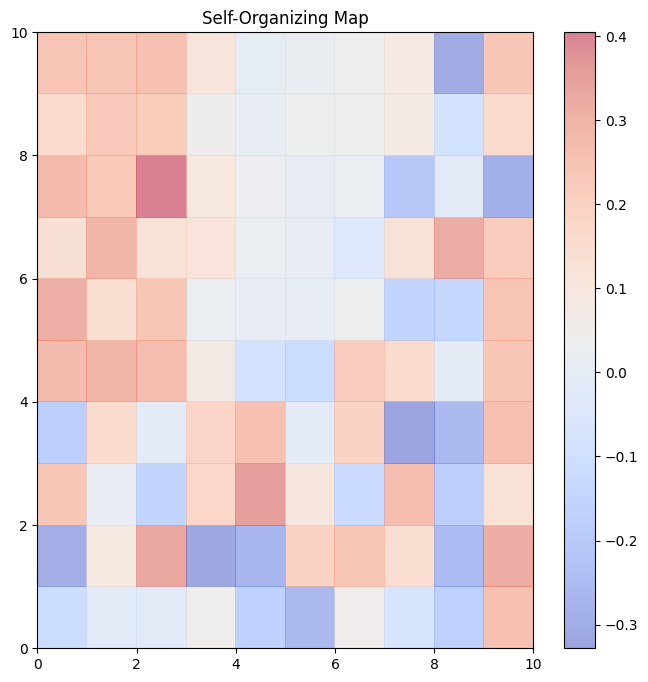

In [4]:
som_size = 10
som = MiniSom(som_size, som_size, norm_data.shape[1], sigma=1.0, learning_rate=0.5)

som.train(norm_data.values, num_iteration=1000)

plt.figure(figsize=(8, 8))
plt.pcolor(som.get_weights()[:, :, 0], cmap='coolwarm', alpha=0.5)
plt.colorbar()
plt.title('Self-Organizing Map')
plt.show()

In [5]:
win_map = som.win_map(norm_data.values)
cluster_characteristics = {}

In [6]:
def plt_som(win_map,col):
    
    cluster_characteristics = {}

    # Loop through the win map to calculate mean prices for each cluster
    for (x, y), indices in win_map.items():
        for i in indices:
            values = data.iloc[i][col].values

        # Calculate mean price for the cluster
        mean_col = np.mean(values) if len(values) > 0 else 0
        median_col = np.median(values) if len(values) > 0 else 0
        std_col = np.std(values) if len(values) > 0 else 0

        # Store in the dictionary
        cluster_characteristics[(x, y)] = {f'mean_{col}': mean_col, f'median_{col}': median_col, f'std_{col}': std_col}
        
    mean_values = np.zeros((10, 10))

    for (x, y), values in cluster_characteristics.items():
        mean_values[x, y] = values[f'mean_{col}']

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(mean_values, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Mean Values')
    plt.title(f'{col} Heatmap of Cluster Means')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Optionally, add grid lines and labels
    plt.xticks(ticks=np.arange(10), labels=np.arange(10))
    plt.yticks(ticks=np.arange(10), labels=np.arange(10))
    plt.grid(color='white', linestyle='-', linewidth=1)

    plt.show()

In [7]:
print(len(data.columns))

24


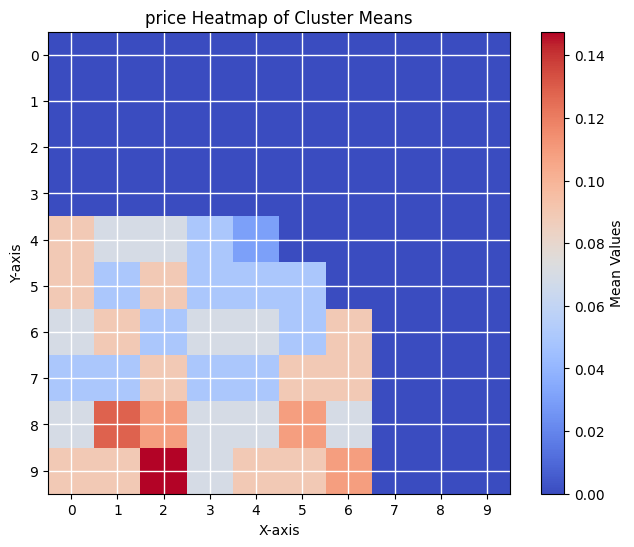

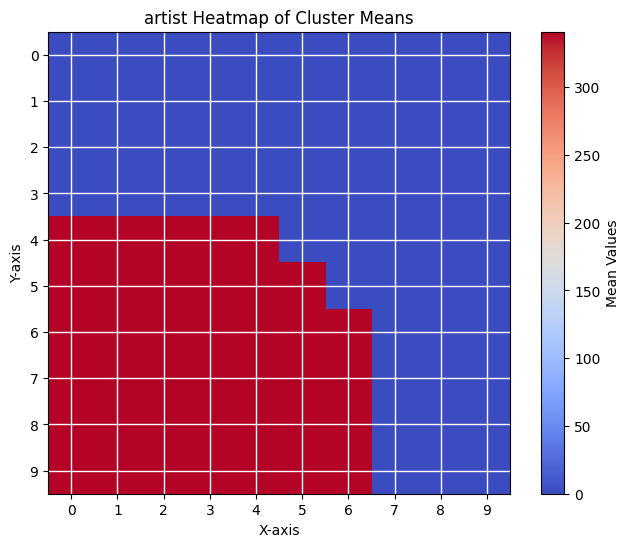

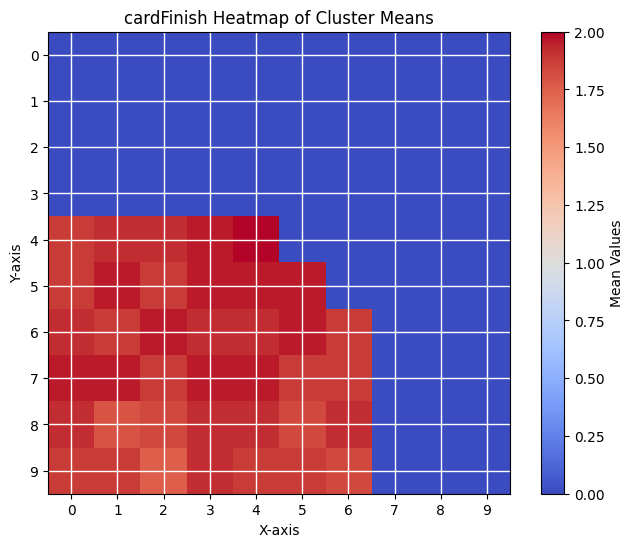

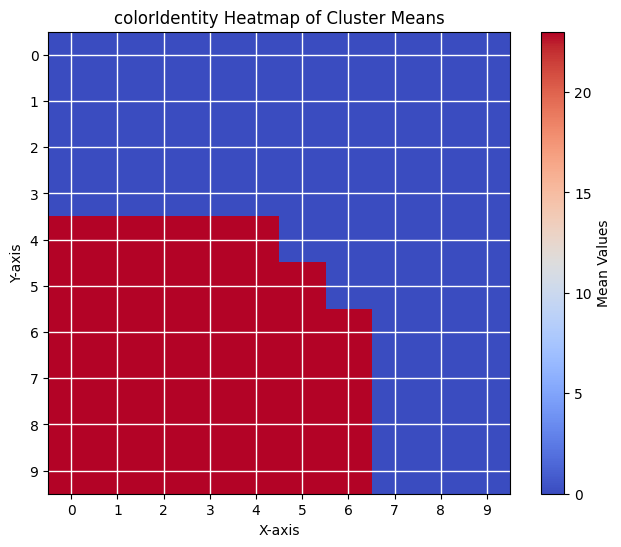

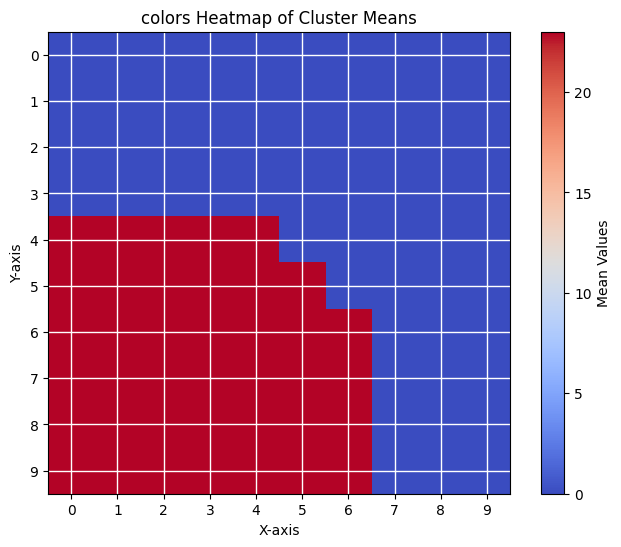

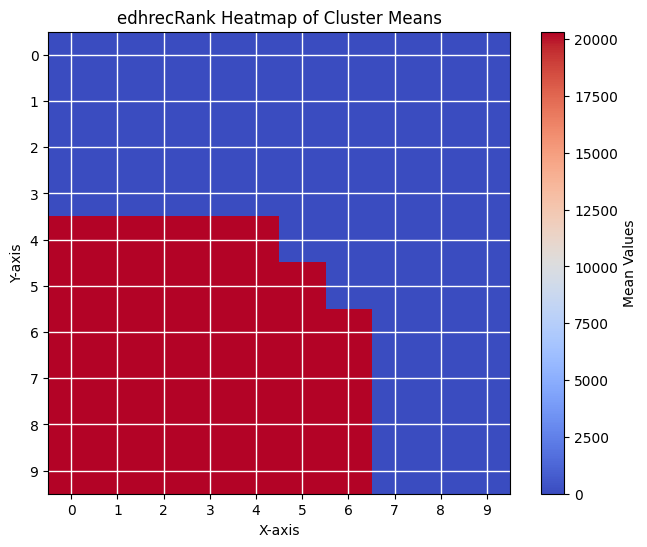

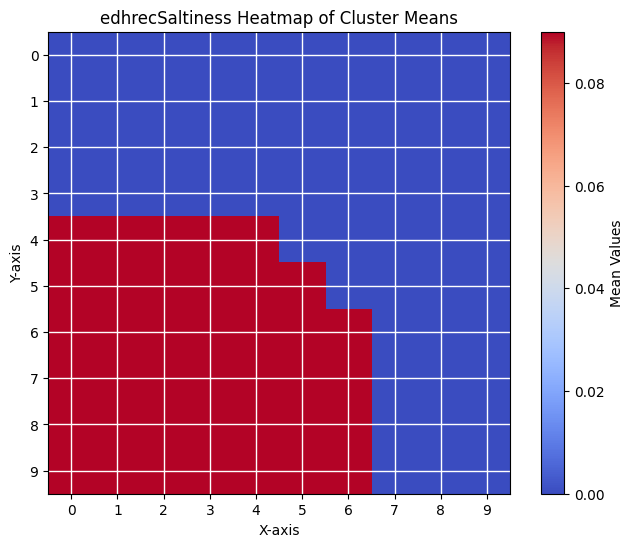

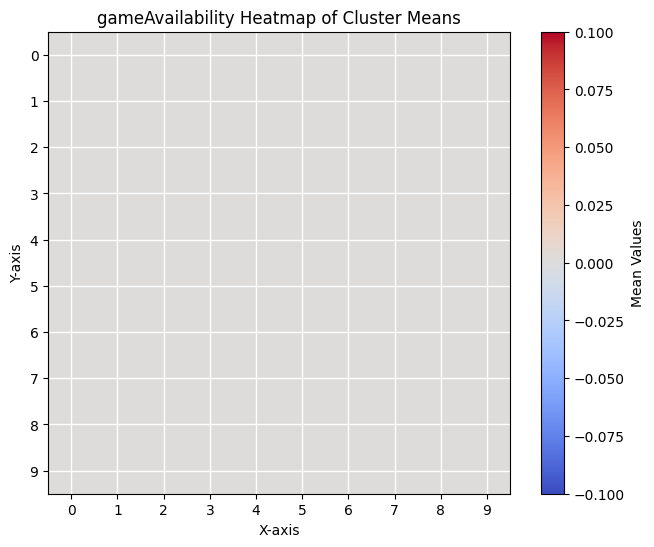

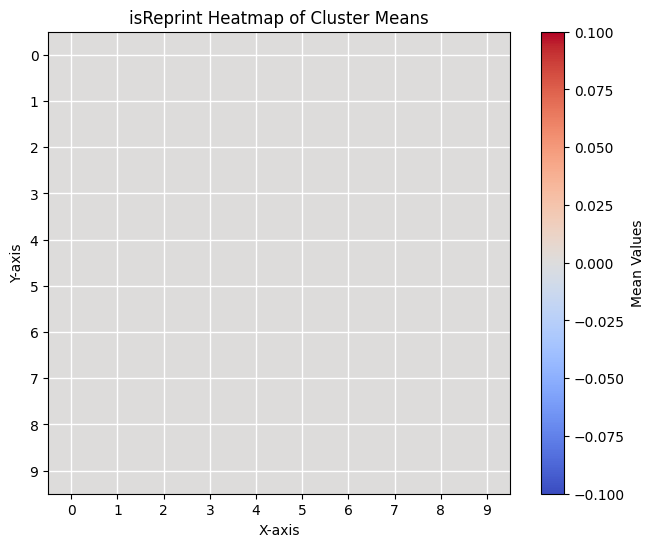

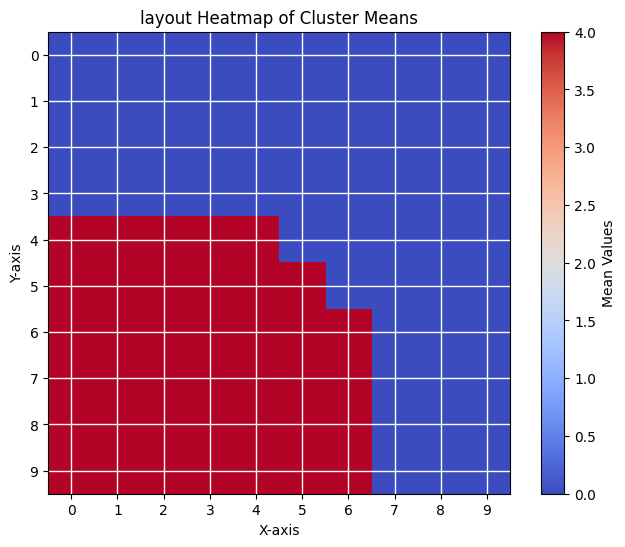

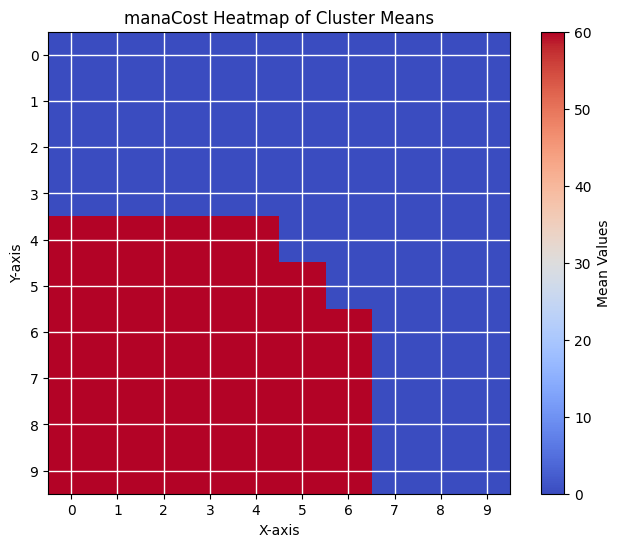

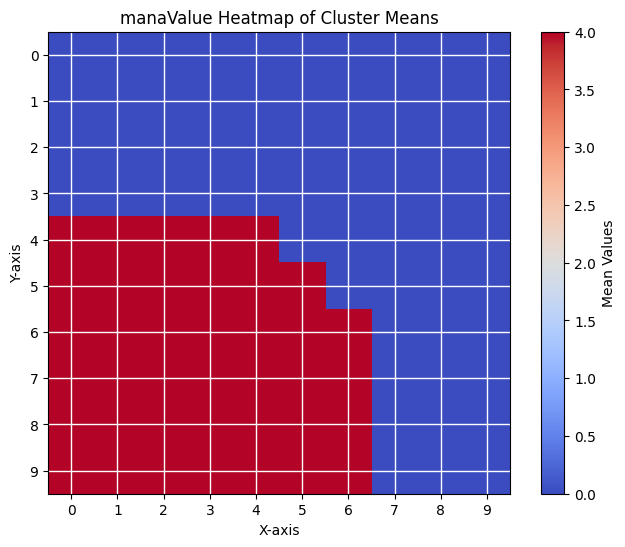

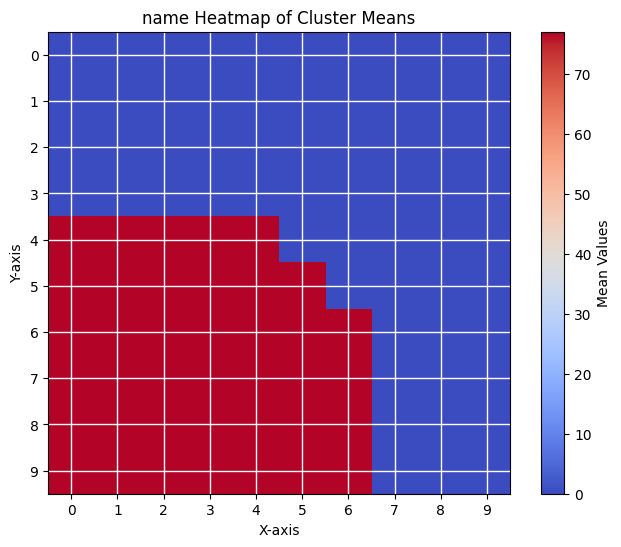

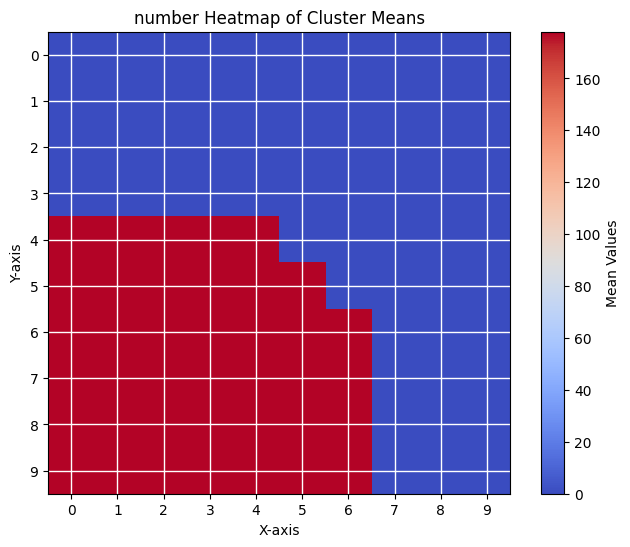

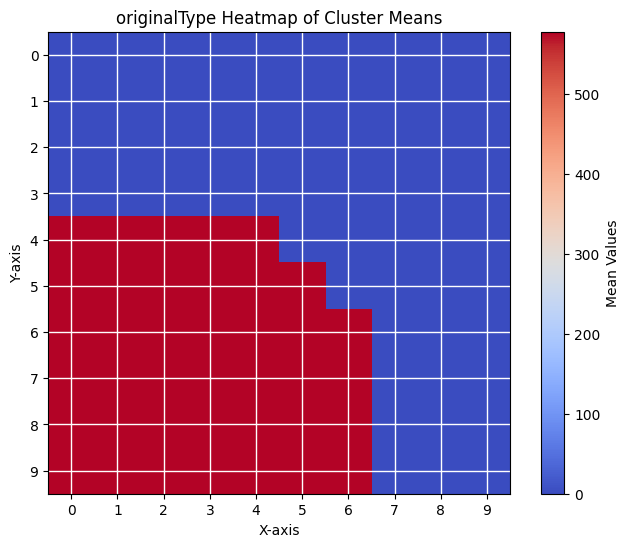

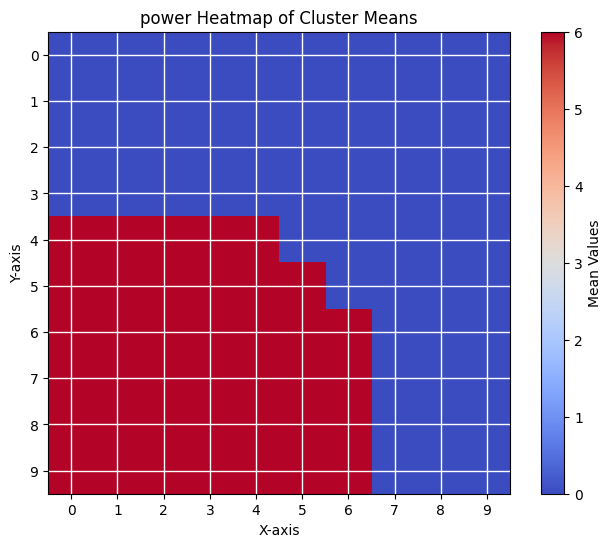

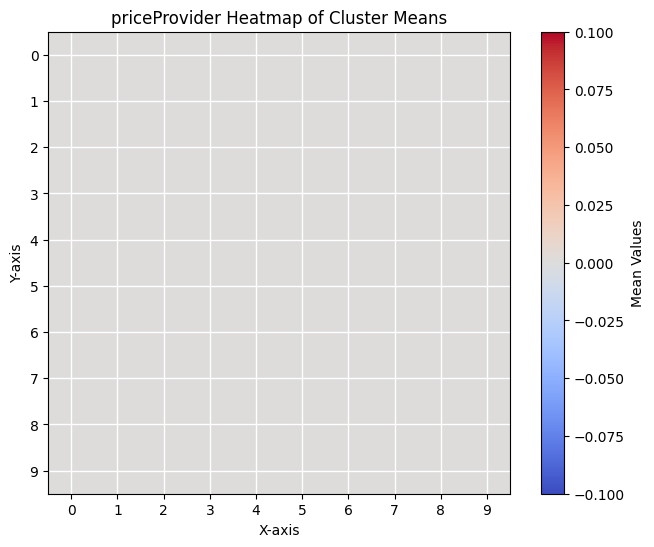

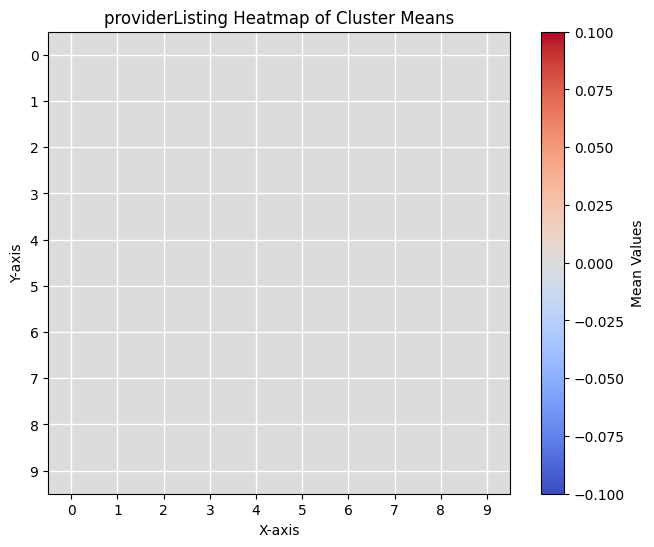

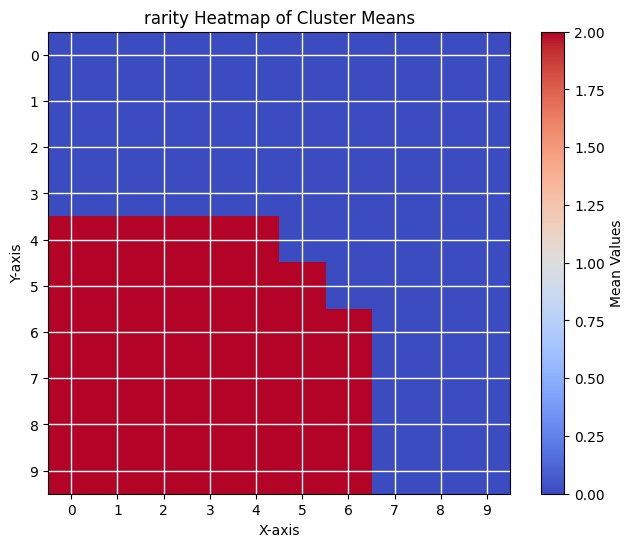

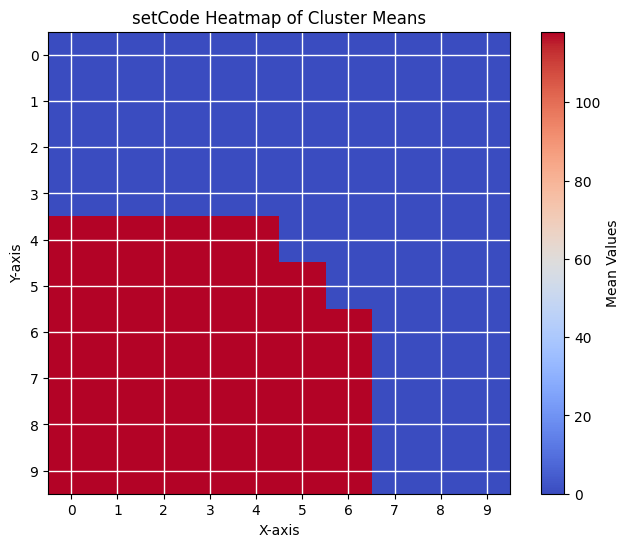

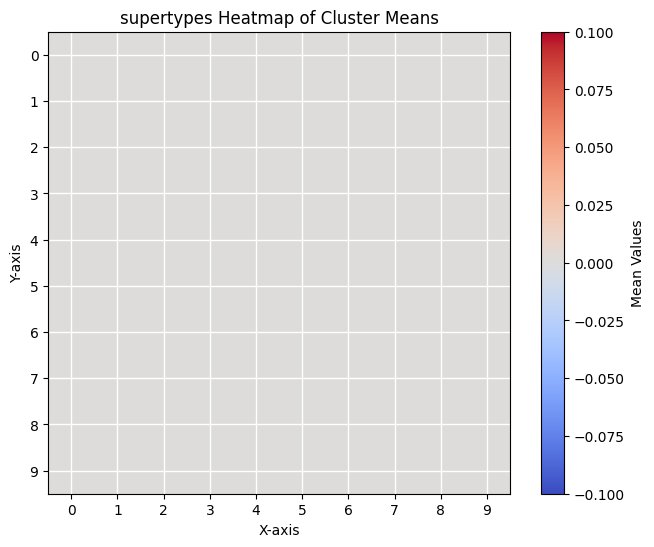

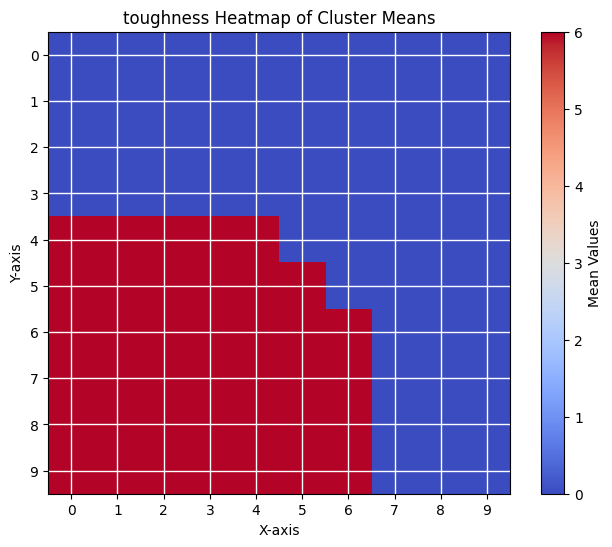

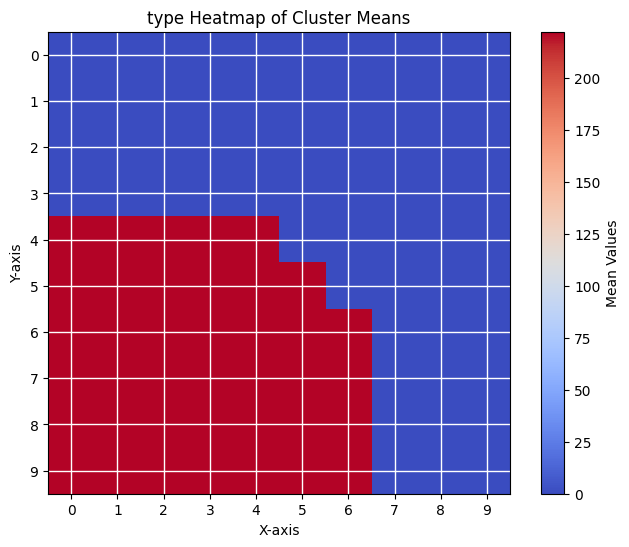

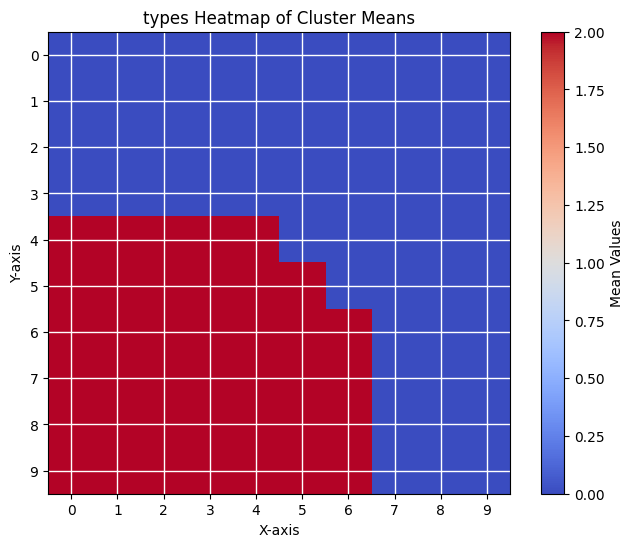

In [8]:
for i in data.columns:
    plt_som(win_map, i)

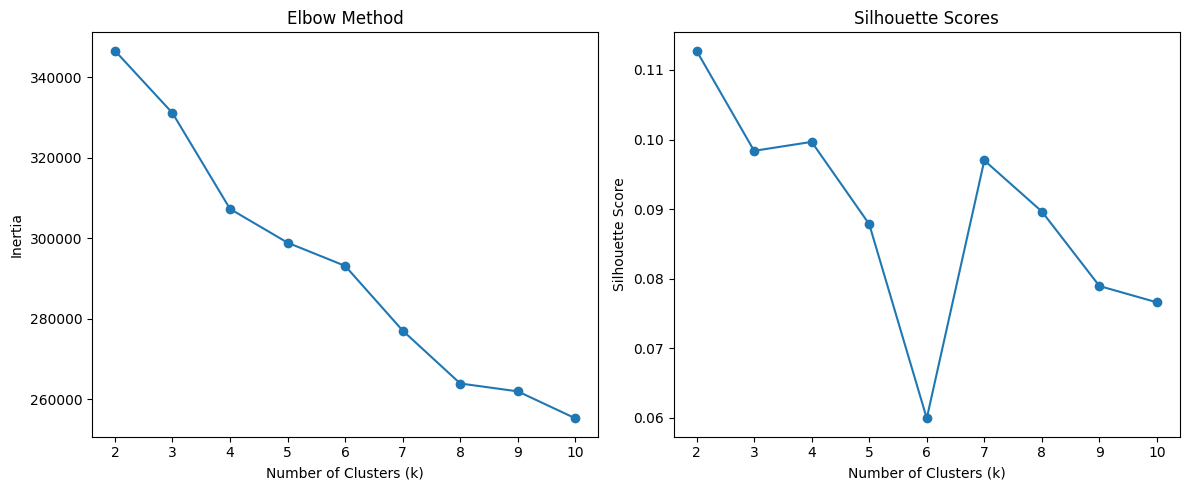

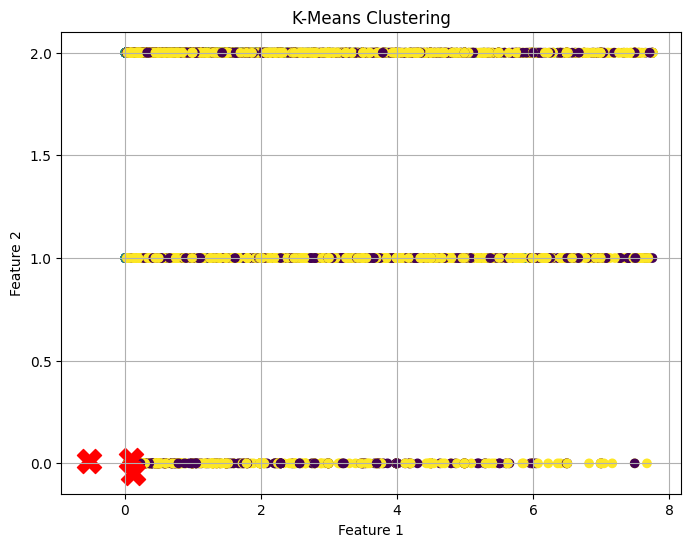

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertia = []
silhouette_scores = []
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Step 4: Plot the Elbow Method results
plt.figure(figsize=(12, 5))

# Inertia Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Step 5: Fit the K-Means model with the chosen k (e.g., k=3)
optimal_k = 3  # Choose based on the Elbow method or Silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Step 6: Add cluster labels to the original DataFrame
data['cluster'] = kmeans.labels_

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['price'], data['cardFinish'], c=data['cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Cluster centers
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()